# Customer Churn

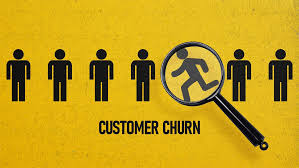

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [51]:
df=pd.read_csv("/content/drive/MyDrive/churn_modeling/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [52]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [54]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [56]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [57]:

encoder=LabelEncoder()
df["Geography"]=encoder.fit_transform(df["Geography"])
df["Gender"]=encoder.fit_transform(df["Gender"])


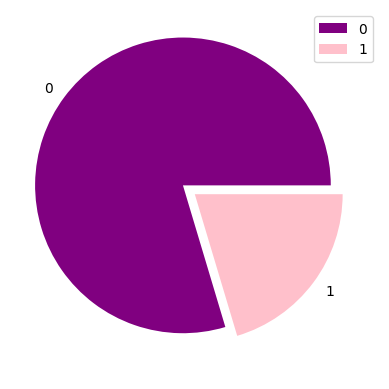

In [58]:
t=df["Exited"].value_counts()
lbl=["0","1"]
plt.pie(t,labels=lbl,explode=[0.1,0],colors=["Purple","pink"])
plt.legend()
plt.show()

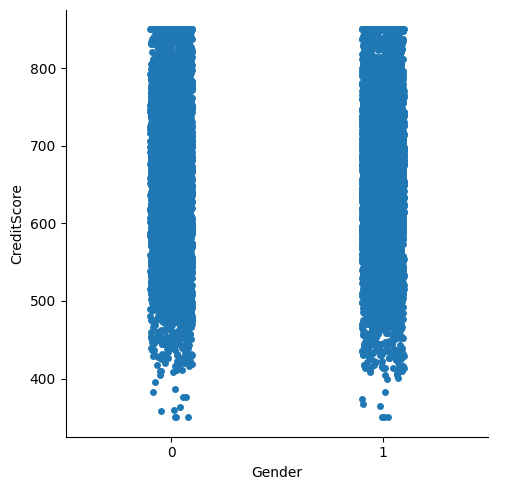

In [59]:

sns.catplot(data=df, x="Gender", y="CreditScore")

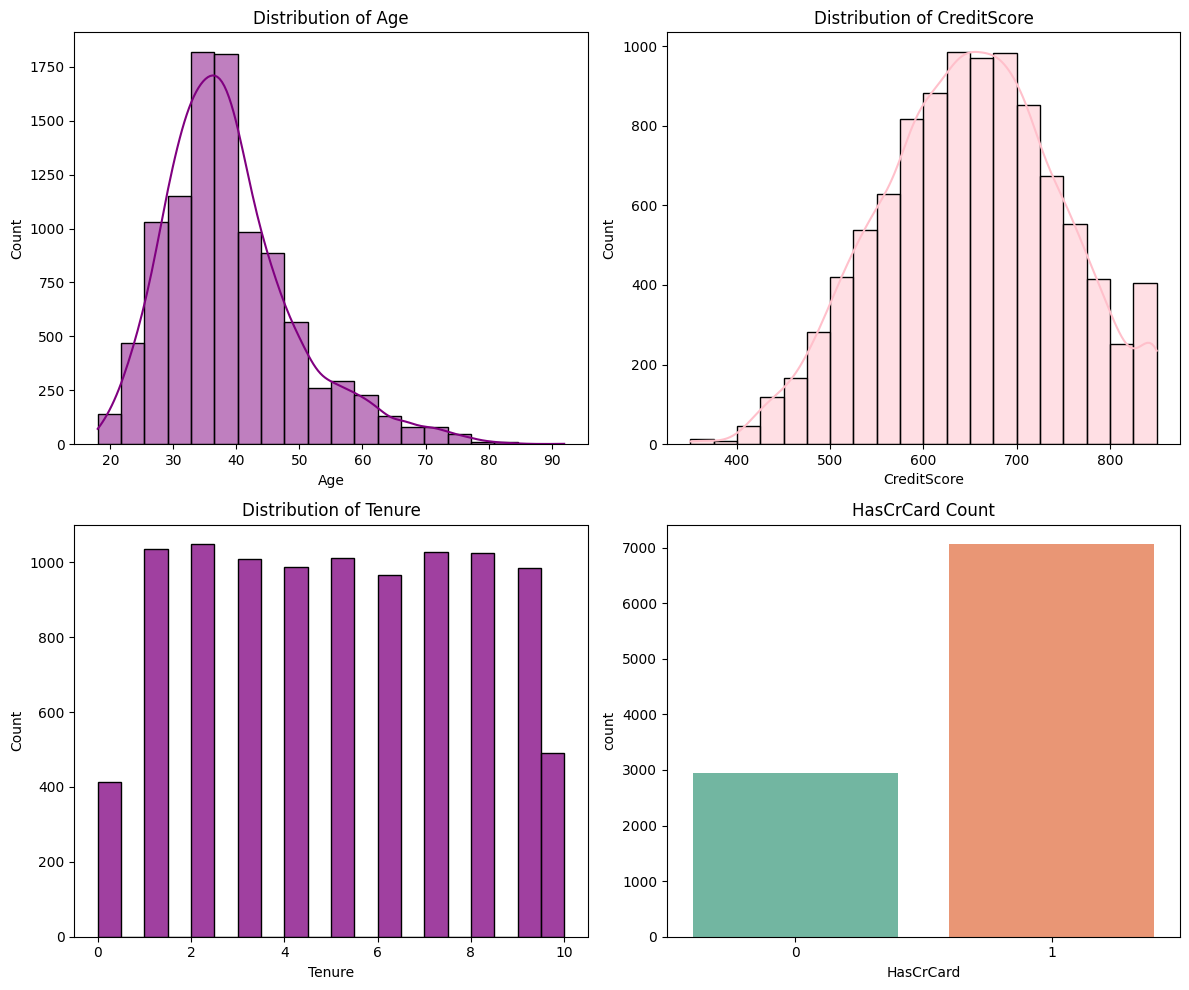

In [60]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


sns.histplot(df['Age'], bins=20, kde=True, color='purple', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')


sns.histplot(df['CreditScore'], bins=20, kde=True, color='pink', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of CreditScore')


sns.histplot(df['Tenure'], bins=20, kde=False, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Tenure')


sns.countplot(x='HasCrCard', data=df, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('HasCrCard Count')


plt.tight_layout()


plt.show()


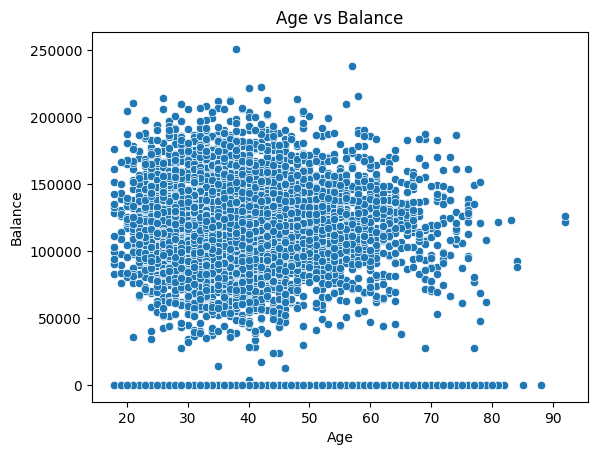

In [61]:
sns.scatterplot(x='Age', y='Balance', data=df)
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


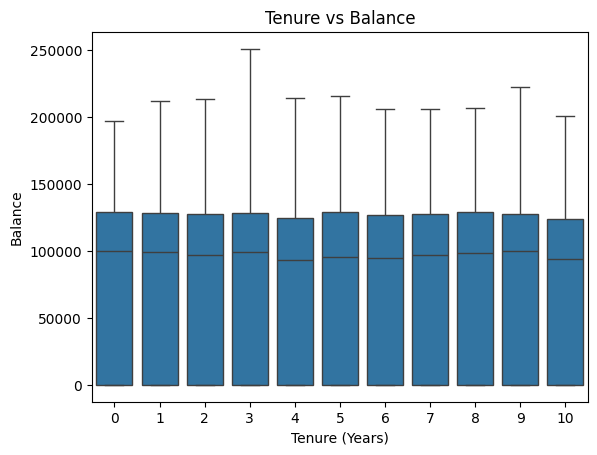

In [62]:
sns.boxplot(x='Tenure', y='Balance', data=df)
plt.title('Tenure vs Balance')
plt.xlabel('Tenure (Years)')
plt.ylabel('Balance')
plt.show()


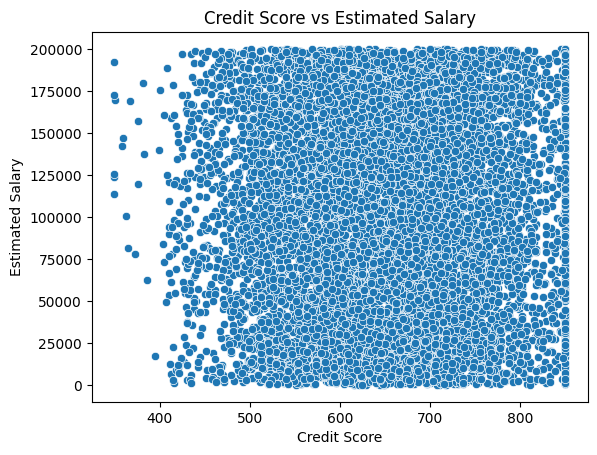

In [63]:
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=df)
plt.title('Credit Score vs Estimated Salary')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.show()


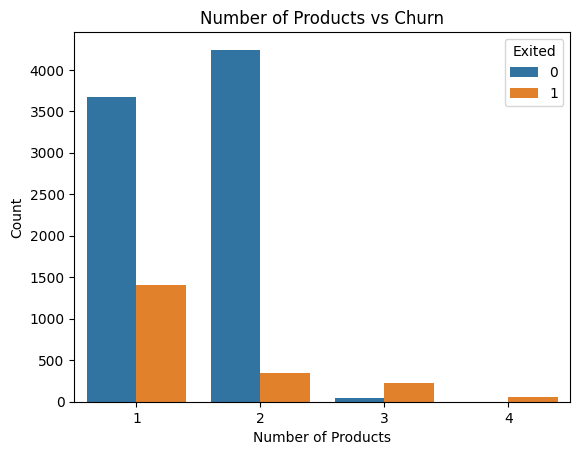

In [64]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Number of Products vs Churn')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()


In [65]:
X=df.iloc[:,:-1]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [66]:
y=df.iloc[:,-1]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


Oversampling due to imbalanced data

In [67]:
os=SMOTE(random_state=42)
X,y=os.fit_resample(X,y)

Scaling

In [68]:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.3257645 , -0.89447227, -0.83376076, ...,  0.77477826,
         1.30498548,  0.01425043],
       [-0.44538022,  1.75311909, -0.83376076, ..., -1.29069187,
         1.30498548,  0.20818209],
       [-1.59804084, -0.89447227, -0.83376076, ...,  0.77477826,
        -0.76629205,  0.23224645],
       ...,
       [-0.49975101,  0.42932341, -0.83376076, ..., -1.29069187,
        -0.76629205,  1.54589309],
       [ 0.90301521, -0.89447227, -0.83376076, ...,  0.77477826,
        -0.76629205, -0.1835263 ],
       [ 0.62028714, -0.89447227, -0.83376076, ...,  0.77477826,
        -0.76629205, -1.2448162 ]])

Model Building

GradientBoostingClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2322
           1       0.84      0.83      0.83      2456

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778

83.04730012557555
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=1)
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2322
           1       0.86      0.86      0.86      2456

    accu

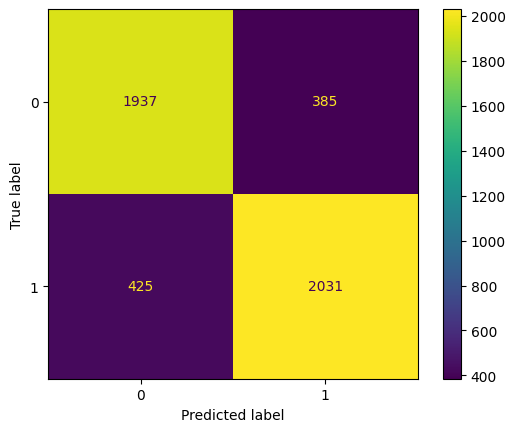

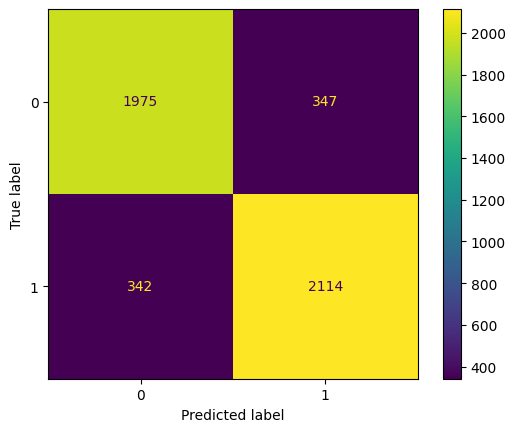

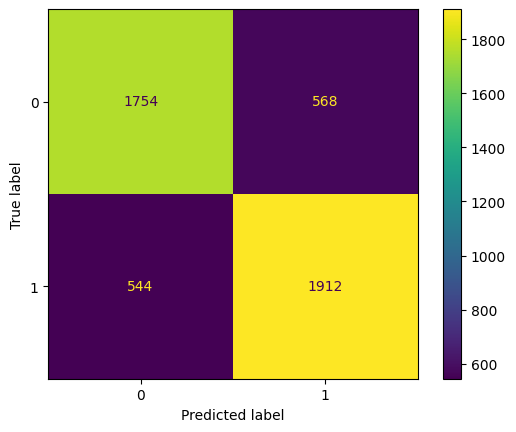

In [69]:

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)
dt=GradientBoostingClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
lr=LogisticRegression(random_state=1)

accuracy_scores_os=[]
model=[dt,rf,lr]
for select in model:
  print(select)
  select.fit(X_train,y_train)
  y_pred=select.predict(X_test)
  y_pred
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  accuracy_os=accuracy_score(y_test,y_pred)*100
  print(accuracy_os)
  accuracy_scores_os.append(accuracy_os)
  print("--"*200)

# Hyperparameter Tuning

Random forest have high accuracy.So it tuned for hyperparameter tuning

In [70]:
params={'n_estimators':[20,40,80,100],'criterion':['gini','entropy','log_loss'],'max_features':['sqrt', 'log2', None]}
clf=RandomizedSearchCV(rf,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [20, 40, 80, 100]},
                   scoring='accuracy')

In [71]:
clf.best_params_

{'n_estimators': 100, 'max_features': 'sqrt', 'criterion': 'gini'}

In [72]:
y_pred=clf.predict(X_test)
y_pred
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2322
           1       0.86      0.86      0.86      2456

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



In [73]:
y_new=clf.predict(scaler.transform([[772,1,1,42,3,75075.31,2,1,0,92888.52]]))
result=y_new.item()

In [74]:
if result==0:
  print("Not Exited")

else:
    print("Exited")

Exited
